---
layout: post

title: Programmers, 2019 카카오 개발자 겨울 인턴십
, 튜플

category: Algorithms
---

# 프로그래머스 문제 중 64065번 '튜플'
<a href = 'https://programmers.co.kr/learn/courses/30/lessons/64065'>https://programmers.co.kr/learn/courses/30/lessons/64065</a>

### 문제설명

셀수있는 수량의 순서있는 열거 또는 어떤 순서를 따르는 요소들의 모음을 튜플(tuple)이라고 합니다. n개의 요소를 가진 튜플을 n-튜플(n-tuple)이라고 하며, 다음과 같이 표현할 수 있습니다.

+ (a1, a2, a3, ..., an)
튜플은 다음과 같은 성질을 가지고 있습니다.

1. 중복된 원소가 있을 수 있습니다. ex : (2, 3, 1, 2)
2. 원소에 정해진 순서가 있으며, 원소의 순서가 다르면 서로 다른 튜플입니다. ex : (1, 2, 3) ≠ (1, 3, 2)
3. 튜플의 원소 개수는 유한합니다.
원소의 개수가 n개이고, 중복되는 원소가 없는 튜플 (a1, a2, a3, ..., an)이 주어질 때(단, a1, a2, ..., an은 자연수), 이는 다음과 같이 집합 기호 '{', '}'를 이용해 표현할 수 있습니다.

+ {{a1}, {a1, a2}, {a1, a2, a3}, {a1, a2, a3, a4}, ... {a1, a2, a3, a4, ..., an}}
예를 들어 튜플이 (2, 1, 3, 4)인 경우 이는

+ {{2}, {2, 1}, {2, 1, 3}, {2, 1, 3, 4}}
와 같이 표현할 수 있습니다. 이때, 집합은 원소의 순서가 바뀌어도 상관없으므로

+ {{2}, {2, 1}, {2, 1, 3}, {2, 1, 3, 4}}
+ {{2, 1, 3, 4}, {2}, {2, 1, 3}, {2, 1}}
+ {{1, 2, 3}, {2, 1}, {1, 2, 4, 3}, {2}}
는 모두 같은 튜플 (2, 1, 3, 4)를 나타냅니다.

특정 튜플을 표현하는 집합이 담긴 문자열 s가 매개변수로 주어질 때, s가 표현하는 튜플을 배열에 담아 return 하도록 solution 함수를 완성해주세요.


### 제한사항

+ s의 길이는 5 이상 1,000,000 이하입니다.
+ s는 숫자와 '{', '}', ',' 로만 이루어져 있습니다.
+ 숫자가 0으로 시작하는 경우는 없습니다.
+ s는 항상 중복되는 원소가 없는 튜플을 올바르게 표현하고 있습니다.
+ s가 표현하는 튜플의 원소는 1 이상 100,000 이하인 자연수입니다.
+ return 하는 배열의 길이가 1 이상 500 이하인 경우만 입력으로 주어집니다.


### 입출력 예

| s|result |
|-|-|
| "{{2},{2,1},{2,1,3},{2,1,3,4}}"| [2, 1, 3, 4]|
|"{{1,2,3},{2,1},{1,2,4,3},{2}}" |[2, 1, 3, 4] |
|"{{20,111},{111}}" | 	[111, 20]|
|"{{123}}" |	[123] |
|"{{4,2,3},{3},{2,3,4,1},{2,3}}" | [3, 2, 4, 1]|

### 입출력 예에 대한 설명

#### 입출력 예 #1
문제 예시와 같습니다.

#### 입출력 예 #2
문제 예시와 같습니다.

#### 입출력 예 #3
(111, 20)을 집합 기호를 이용해 표현하면 {{111}, {111,20}}이 되며, 이는 {{20,111},{111}}과 같습니다.

#### 입출력 예 #4
(123)을 집합 기호를 이용해 표현하면 {{123}} 입니다.

#### 입출력 예 #5
(3, 2, 4, 1)을 집합 기호를 이용해 표현하면 {{3},{3,2},{3,2,4},{3,2,4,1}}이 되며, 이는 {{4,2,3},{3},{2,3,4,1},{2,3}}과 같습니다.

---

문제를 이해하는데 조금 헤맸던 문제이다. 풀어서 정리하자면 s가 문자열로 주어지는데 s의 원소 {{a1}, {a1, a2}, {a1, a2, a3}, {a1, a2, a3, a4}, ... {a1, a2, a3, a4, ..., an}}를 {a1}, {a1, a2}, {a1, a2, a3} ...등 숫자들의 리스트로 쪼개 원소의 길이 순으로 정렬하면 순서대로 하나씩 새로 추가 되는 원소가 있고, 그 원소를 순서대로 리스트에 저장하면 된다.

여기까지만 접근하고 코드를 작성했고 코드는 다음과 같다.

### Solve 1

In [8]:
def solution(s):
     # 문자열의 앞뒤의 '{{', '}}'는 제외하고 '},{' 를 기준으로 문자열을 쪼갠다.
    k = s[2:-2].split('},{')
    
    tmps = []
    for i in k:
         # 'a1, a2, a3' 형태의 문자열을 ','로 쪼개 tmps에 저장한다.
        tmps.append(list(map(int, i.split(','))))

     # tmps를 길이순으로 정렬한다.
    tmps = sorted(tmps, key =lambda x: len(x))

     # 새로 추가되는 원소를 찾아 answer에 저장한다.
    answer = []
    for tmp in tmps:
        for t in tmp:
            if t not in answer:
                answer.append(t)
    print(answer)
    return answer

solution("{{4,2,3},{3},{2,3,4,1},{2,3}}")

[3, 2, 4, 1]


[3, 2, 4, 1]

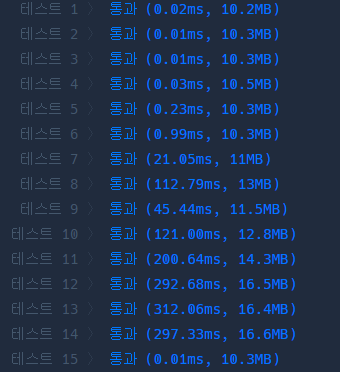

### Solve 2

문제를 이해하는데 조금 헤맸던 문제이다. 풀어서 정리하자면 s가 문자열로 주어지는데 s의 원소 {{a1}, {a1, a2}, {a1, a2, a3}, {a1, a2, a3, a4}, ... {a1, a2, a3, a4, ..., an}}를 {a1}, {a1, a2}, {a1, a2, a3} ...등 숫자들의 리스트로 쪼개 원소의 길이 순으로 정렬하면 순서대로 하나씩 새로 추가 되는 원소가 있고, 그 원소를 순서대로 리스트에 저장하면 된다.

여기서 조금더 생각해보면 결국 원소의 수를 세고, 개수가 많은 순으로 저장해도 똑같은 결과가 나오는 걸 알 수있다. 개수를 세는 Counter모듈을 활용하면 더 빠르게 동작한다.

In [9]:
from collections import Counter

def solution(s):
    k = s[2:-2].split('},{')
    
    cnt_elements = Counter()
    for i in k:
        cnt_elements += Counter(i.split(','))
        
    answer = []
    for e, cnt in cnt_elements.most_common():
        answer.append(int(e))
    print(answer)
    return answer

solution("{{4,2,3},{3},{2,3,4,1},{2,3}}")

[3, 2, 4, 1]


[3, 2, 4, 1]

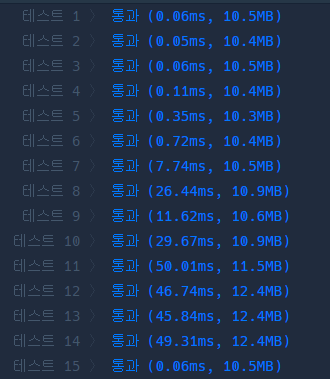